In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

file_names = ['data/potholes_1.csv', 'data/potholes_2.csv']

potholes = pd.concat((pd.read_csv(i) for i in file_names))


potholes = potholes.iloc[:,
    [0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18
    ]
]
potholes = potholes.dropna(subset = ["ZIP", "Community Area"])
potholes['Community Area'] = potholes['Community Area'].astype(int).astype('category')

potholes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558055 entries, 1 to 310476
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CREATION DATE       558055 non-null  object  
 1   STATUS              558055 non-null  object  
 2   COMPLETION DATE     550786 non-null  object  
 3   CURRENT ACTIVITY    391921 non-null  object  
 4   MOST RECENT ACTION  390310 non-null  object  
 5   ZIP                 558055 non-null  float64 
 6   X COORDINATE        557921 non-null  float64 
 7   Y COORDINATE        557921 non-null  float64 
 8   Ward                558054 non-null  float64 
 9   Police District     558054 non-null  float64 
 10  Community Area      558055 non-null  category
 11  LATITUDE            557271 non-null  float64 
 12  LONGITUDE           557271 non-null  float64 
 13  LOCATION            557271 non-null  object  
dtypes: category(1), float64(7), object(6)
memory usage: 60.1+ MB


In [2]:
# Convert strings to times
potholes["CREATION DATE"] = pd.to_datetime(potholes["CREATION DATE"], format = "%m/%d/%Y")
potholes["COMPLETION DATE"] = pd.to_datetime(potholes["COMPLETION DATE"], format = "%m/%d/%Y")

# Create completion time variable
potholes["COMPLETION TIME"] = potholes["COMPLETION DATE"] - potholes["CREATION DATE"]

In [3]:
census_data = pd.read_csv('data/chicago_census_data.csv')
census_data = census_data.iloc[:, [0,7,8]].dropna()
census_data['HARDSHIP INDEX'] = census_data['HARDSHIP INDEX'].astype(int)

In [10]:
potholes_c = potholes.groupby(["Community Area"])['CREATION DATE'].count()
potholes_mean = potholes.groupby(["Community Area"]).agg({'COMPLETION TIME': 'mean'})
pd_holes = potholes_c.to_frame(name='Count').reset_index()
potholes_mean["COMPLETION TIME"] = potholes_mean["COMPLETION TIME"].apply(lambda x: x.days)
potholes_mean
#potholes_mean["Community Area"] = potholes_mean["Community Area"].astype('category')

,COMPLETION TIME
Community Area,
0,43
1,38
2,45
3,36
4,43
...,...
73,21
74,23
75,20


In [11]:
census_data.rename(columns = {'Community Area Number': 'Community Area'}, inplace = True)
census_data['Community Area'] = census_data['Community Area'].astype(int)
merged_data = pd.merge(census_data, pd_holes, on = 'Community Area')
working_data = pd.merge(merged_data, potholes_mean, on = 'Community Area').sort_values(["COMPLETION TIME"], ascending = False)
working_data['Community Area'] = working_data['Community Area'].astype('category')
working_data

,Community Area,PER CAPITA INCOME,HARDSHIP INDEX,Count,COMPLETION TIME
13,14,21323,53,8118,54
15,16,27249,34,12358,49
8,9,40959,8,5003,46
1,2,23040,46,15426,45
26,27,12961,83,4227,45
...,...,...,...,...,...
57,58,13089,84,6903,16
37,38,23472,57,3725,15
59,60,22694,43,3908,15
64,65,16907,56,9018,15


Index(['Community Area', 'PER CAPITA INCOME ', 'HARDSHIP INDEX', 'Count',
       'COMPLETION TIME'],
      dtype='object')


Text(0, 0.5, 'Average Completion Time')

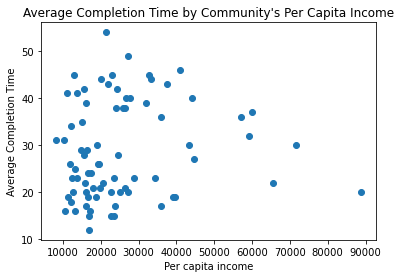

In [6]:
%matplotlib inline
plt.scatter(working_data["PER CAPITA INCOME "], working_data["COMPLETION TIME"])
plt.title("Average Completion Time by Community's Per Capita Income")
plt.xlabel("Per capita income")
plt.ylabel("Average Completion Time")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 13 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Community Area      6 non-null      category
 1   PER CAPITA INCOME   6 non-null      int64   
 2   HARDSHIP INDEX      6 non-null      int64   
 3   Count               6 non-null      int64   
 4   COMPLETION TIME     6 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 2.9 KB


<BarContainer object of 6 artists>

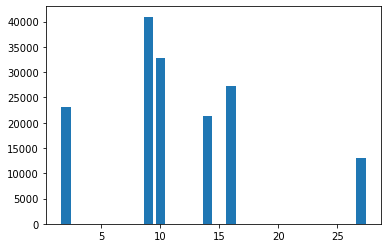

In [13]:
# What is the per capita income of commmunities with top 5 longest completion times?
# Bottom 5?
top_5 = working_data[working_data["COMPLETION TIME"] >= 45]
top_5.info()

bottom_5 = working_data[working_data["COMPLETION TIME"] <= 16]
bottom_5

plt.bar(top_5["Community Area"], top_5["PER CAPITA INCOME "])
#Name each Community Area so x-axis is categorical